In [1]:
import numpy as np
import matplotlib.image as mpimage #to read images
import matplotlib.pyplot as plt 
import cv2 #computer vision library

%matplotlib qt
%matplotlib inline

In [2]:
#Read in the image
image = mpimage.imread('images/car.jpg')

#Print out he imagem dimensions
print('Image dimensions:', image.shape)

Image dimensions: (720, 1280, 3)


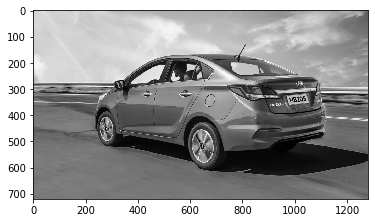

In [3]:
#Change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray')

In [4]:
#print specific grayscale pixel values

x = 200
y = 150
pixel_val = gray_image[y,x]
print(pixel_val)

210


In [5]:
# Finds the maximum and minimum grayscale values in this image

max_val = np.amax(gray_image)
min_val = np.amin(gray_image)

print('Max: ', max_val)
print('Max: ', min_val)

Max:  255
Max:  0


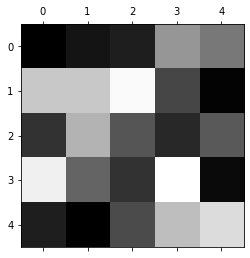

In [6]:
# Create a 5x5 image using just grayscale, numerical values

tiny_image = np.array([[0, 20, 30, 150, 120 ],
                       [200, 200, 250, 70, 3],
                       [50, 180, 85, 40, 90],
                       [240, 100,50, 255,10],
                       [30, 0, 75, 190 , 220]])

#To show the pixel grid using matshow
plt.matshow(tiny_image, cmap='gray')

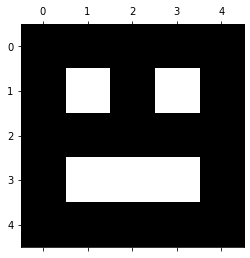

In [7]:
face_image = np.array([[0, 0, 0, 0, 0 ],
                       [0, 200, 0, 200, 0],
                       [0, 0, 0, 0, 0],
                       [0, 200,200, 200,0],
                       [0, 0, 0, 0 , 0]])

#To show the pixel grid using matshow
plt.matshow(face_image, cmap='gray')

PROJECT 2

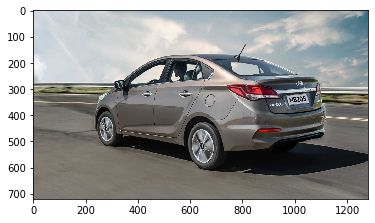

In [8]:
#Read in the image
image = mpimage.imread('images/car.jpg')

plt.imshow(image)

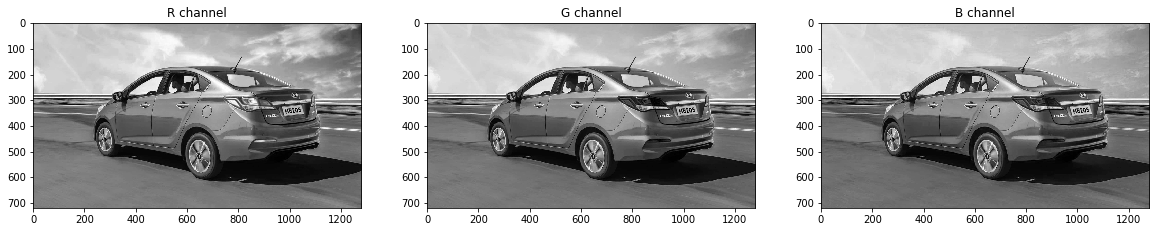

In [9]:
# Isolate RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

# Which area has the lowest value for red? What about for blue

## PROJECT 3

In [10]:
#Read in the image
image = cv2.imread('images/ball.jpg')

#Print out the type of image data and its dimensions
print('This image is: ', type(image),
     'with dimensions:', image.shape)

This image is:  <class 'numpy.ndarray'> with dimensions: (923, 1355, 3)


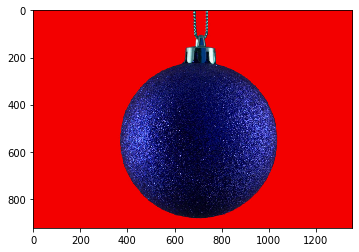

In [11]:
#Display the image
plt.imshow(image)

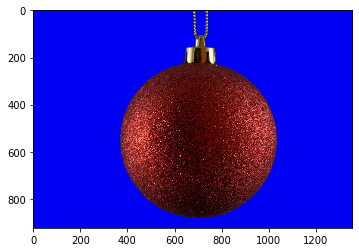

In [12]:
#Make a copy of the image
image_copy = np.copy(image)

#Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_copy)

In [13]:
#Define our color selection boundaries in RGB values
lower_blue = np.array((0, 0, 220))
upper_blue = np.array((50, 70, 255))

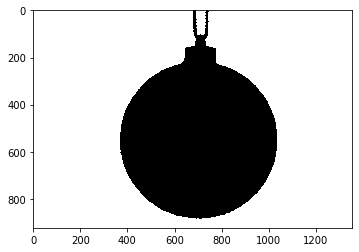

In [14]:
#Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Visualize the mask
plt.imshow(mask, cmap='gray')

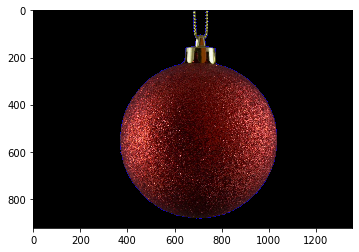

In [15]:
#Mask the image to let the ball show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0,0,0]

plt.imshow(masked_image)

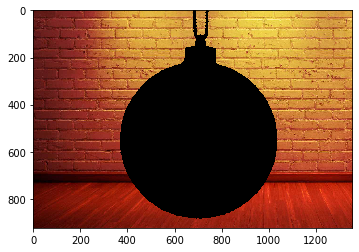

In [16]:
#Load in a background image and convert it to RGB
background_image = cv2.imread('images/background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

#Crop it to the right size (1013x1920)
crop_background = background_image[0:923, 0:1355]

#Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

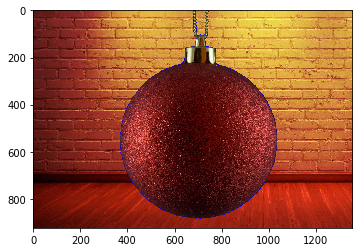

In [17]:
# Add the two images together to create a complete image
complete_image = crop_background + masked_image

plt.imshow(complete_image)

## Color Space and Transforms

In [18]:
balloon_i = cv2.imread('images/general/water_balloons.jpg')
balloon_i_copy = np.copy(balloon_i)

#Print out the type of image data and its dimensions
print('This image is: ', type(balloon_i_copy),
     'with dimensions:', balloon_i_copy.shape)

This image is:  <class 'numpy.ndarray'> with dimensions: (638, 960, 3)


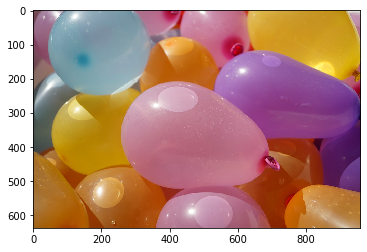

In [19]:
balloon_i_copy = cv2.cvtColor(balloon_i_copy, cv2.COLOR_BGR2RGB)
plt.imshow(balloon_i_copy)

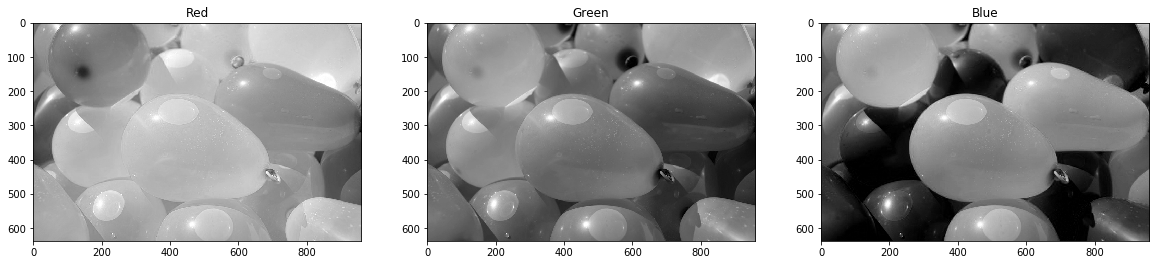

In [20]:
# RGB Channels

r = balloon_i_copy[:, :, 0]
g = balloon_i_copy[:, :, 1]
b = balloon_i_copy[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20 , 10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

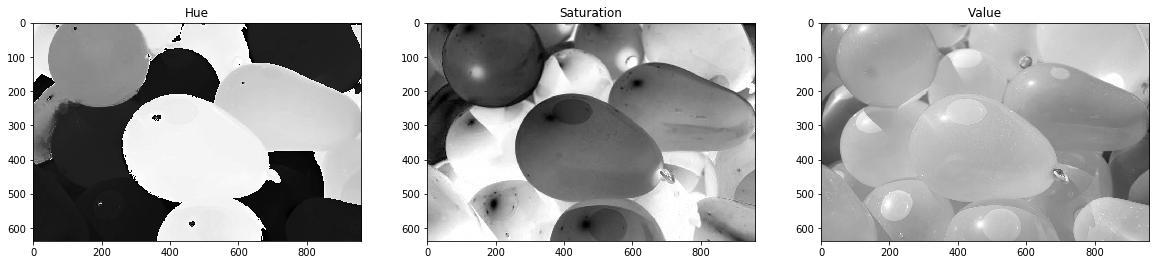

In [21]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(balloon_i_copy, cv2.COLOR_RGB2HSV)

h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20 , 10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

In [22]:
# Define our color selection criteria in RGB values
lower_pink = np.array([180, 0, 100])
upper_pink = np.array([255, 255, 230])

In [23]:
# Define our color selection criteria in HSV values
lower_hue = np.array([162, 0, 0])
upper_hue = np.array([200, 255, 255])

Text(0.5, 1.0, 'RGB selection')

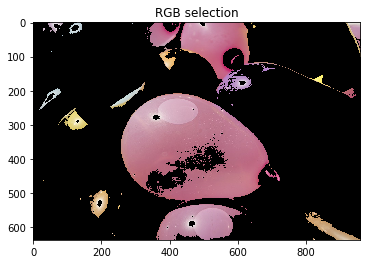

In [24]:
# RGB mask

mask_rgb = cv2.inRange(balloon_i_copy, lower_pink, upper_pink)

#Create an copy and mask the image
masked_image = np.copy(balloon_i_copy)
masked_image[mask_rgb == 0] = [0,0,0]

plt.imshow(masked_image)
plt.title('RGB selection')

Text(0.5, 1.0, 'HSV selection')

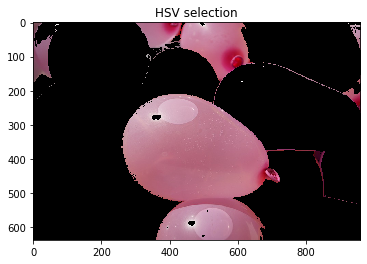

In [25]:
# HSV mask

mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

#Create an copy and mask the image
masked_image = np.copy(balloon_i_copy)
masked_image[mask_hsv == 0] = [0,0,0]

plt.imshow(masked_image)
plt.title('HSV selection')